In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/home/aiffel0042/aiffel/data_augmentation/images/mycat.jpg'

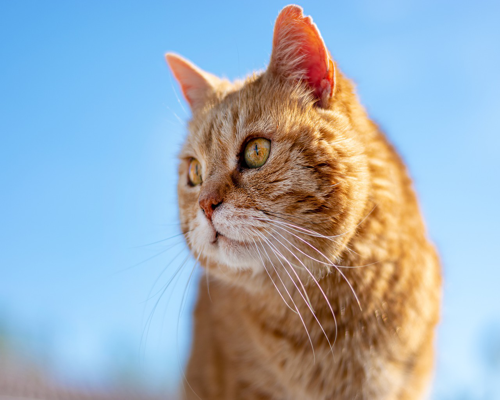

In [2]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

## Flip

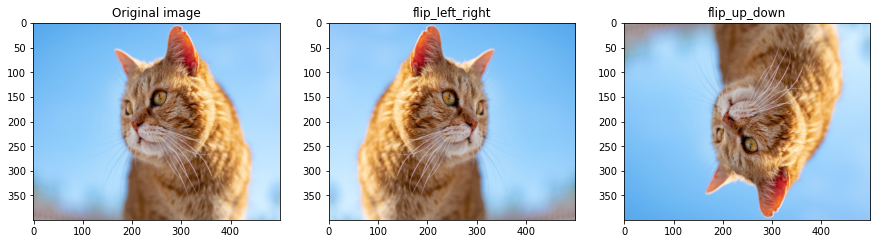

In [3]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(15, 15))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

## Random Flip

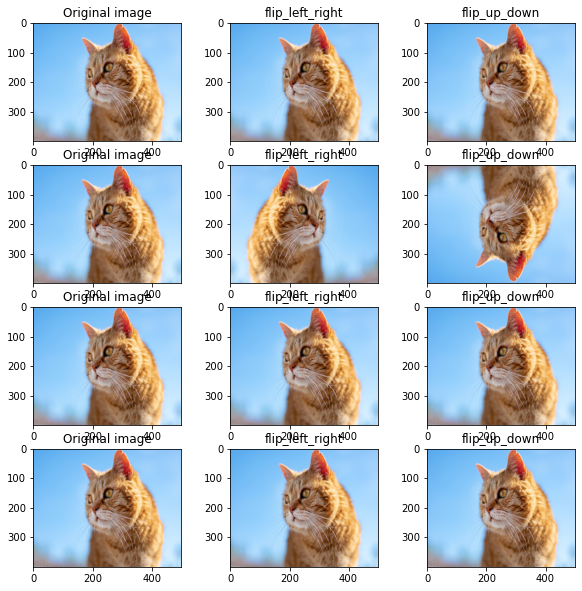

In [4]:
plt.figure(figsize=(10, 10))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

## central_fraction

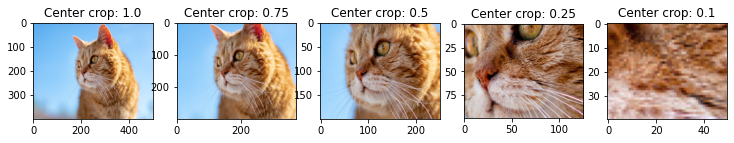

In [5]:
plt.figure(figsize=(15, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

## Random central crop

In [8]:
# central_fraction은 얼마나 확대를 할지를 조정하느 매개변수이다. 
# tf.random.uniform을 사용해서 central_crop에 매개변수로 전달해준다.
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

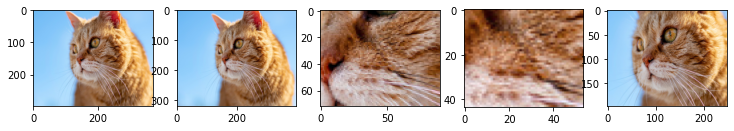

In [7]:
plt.figure(figsize=(15, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

## Random Crop

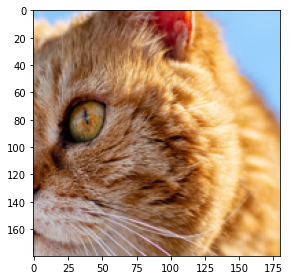

In [9]:
# apply random_crop on cat image
plt.figure(figsize=(15, 15))

random_crop_tensor = tf.image.random_crop(image_tensor,[180,180,3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.subplot(1,3,1)
plt.imshow(random_crop_image)

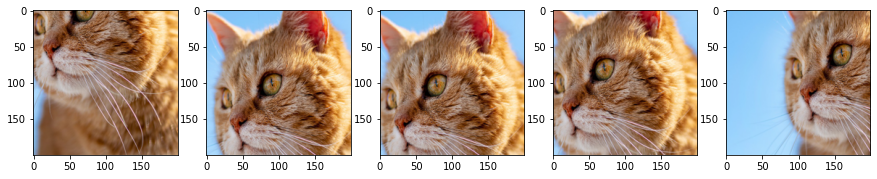

In [10]:
# display 5 random cropped images
plt.figure(figsize=(15, 15))

for i in range(5):
    random_crop_tensor = tf.image.random_crop(image_tensor,[200,200,3])
    random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
    plt.subplot(1,5,i+1)
    plt.imshow(random_crop_image)

## Random Brightness

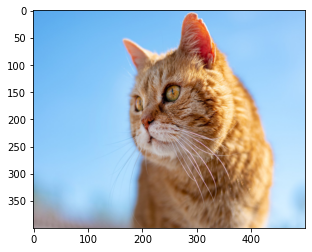

In [17]:
cropped_tensor = tf.image.random_brightness(image_tensor, max_delta=255)
plt.imshow(cropped_img)

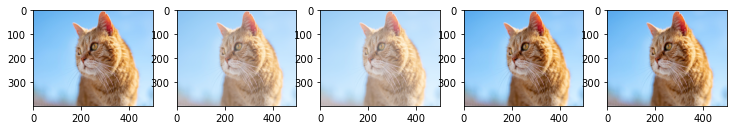

In [18]:
plt.figure(figsize=(15, 15))

col = 5
for i in range(5):
    cropped_tensor = tf.image.random_brightness(image_tensor, max_delta=255)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

## imgaug 라이브러리

In [19]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)

### iaa.Affine()

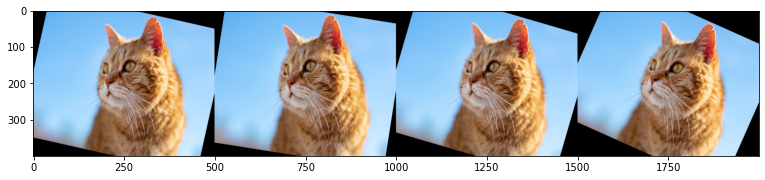

In [20]:
# 아핀 변환(Affine transform)을 이미지에 적용합니다.
# -25도와 25도 사이에 랜덤하게 각도를 변환
images = [image_arr, image_arr, image_arr, image_arr]
rotate = iaa.Affine(rotate=(-25, 25))
images_aug = rotate(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

### iaa.Crop()

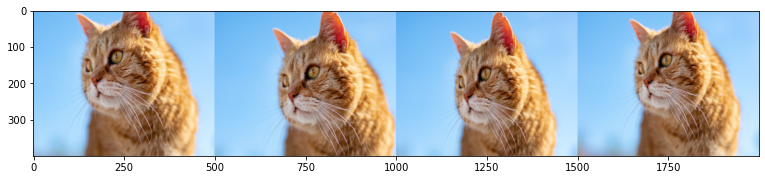

In [21]:
# Crop 하려는 원본 이미지의 비율을 매개변수로 사용
images = [image_arr, image_arr, image_arr, image_arr]
crop = iaa.Crop(percent=(0, 0.2))
images_aug = crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

### iaa.Sequential()

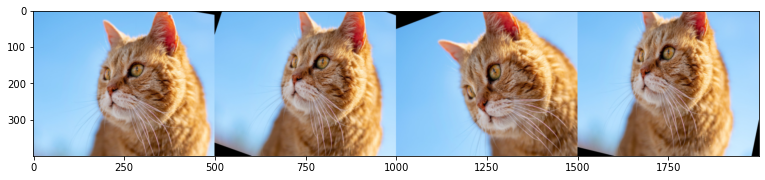

In [22]:
#  여러 가지의 augmentation 기법을 순차적으로 적용할 수 있습니다
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

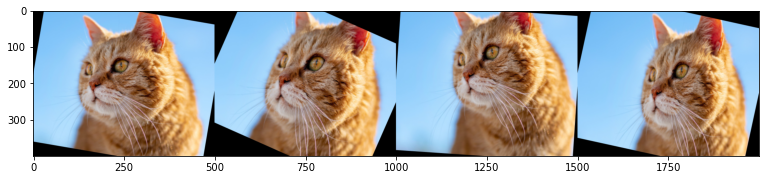

In [23]:
#  random을 활용해서 순서를 바꿀 수 있도록하는 코드
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
], random_order=True)
images_aug = rotate_crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

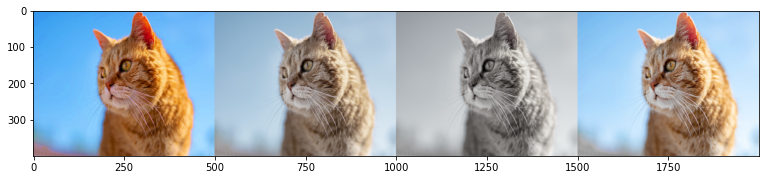

In [24]:
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

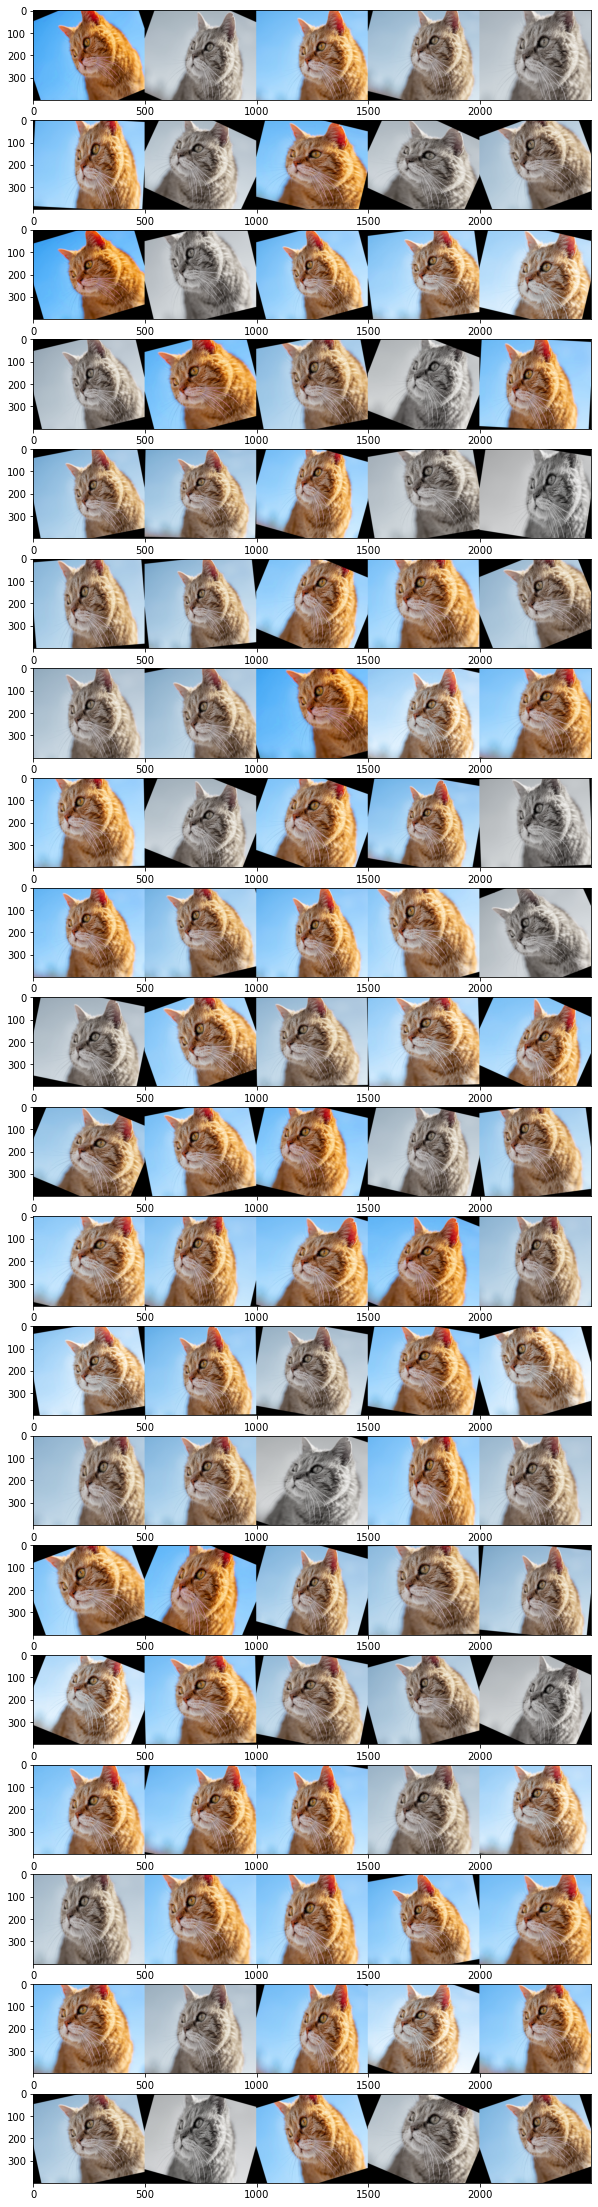

In [25]:
# 각종 augmentation 기법을 활용하면 매우 다양한 조합
seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])

plt.figure(figsize=(10, 40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,1,i+1)
    plt.imshow(np.hstack(images_aug))

plt.show()

## 더 나아간 기법들

[GAN을 활용한 Data augmentation](http://cs231n.stanford.edu/reports/2017/pdfs/300.pdf)